In [28]:
# import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-whitegrid')

In [10]:
from dotenv import load_dotenv
load_dotenv('c:/Users/Sungwon Kim/Fintech/.env')

True

In [11]:
# Get credentials for OAuth authentication
# tweeter api key (.env)
consumerKey = os.getenv("TWITTER_CONSUMER_KEY")
consumerSecret = os.getenv("TWITTER_CONSUMER_SECRET_KEY")
accessToken = os.getenv("TWITTER_ACCESS_TOKEN")
accessTokenSecret = os.getenv("TWITTER_ACCESS_TOKEN_SECRET")

In [13]:
#  Create the authentication object
authenticate =  tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [50]:
d_msg = api.get_direct_message(screen_name = "elonmusk")

TweepError: [{'code': 93, 'message': 'This application is not allowed to access or delete your direct messages.'}]

In [39]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "elonmusk", count = 1000, lang="en", tweet_mode="extended")

# Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') '+ tweet.full_text + '\n')
    i = i+1

Show the 5 recent tweets: 

1) Only thing beyond ludicrous is plaid https://t.co/rHuWk20EGG

2) @xiang_aw @WholeMarsBlog This does seem like the opposite of open. OpenAI is essentially captured by Microsoft.

3) @WholeMarsBlog Haha true

4) @oneandonlyheady Maybe I will …

5) @TechAmazing @UniverCurious Jets are so cool



In [62]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

#  Show the first 5 rows of data
df.head()

,Tweets
0,Only thing beyond ludicrous is plaid https://t...
1,@xiang_aw @WholeMarsBlog This does seem like t...
2,@WholeMarsBlog Haha true
3,@oneandonlyheady Maybe I will …
4,@TechAmazing @UniverCurious Jets are so cool


In [78]:
#  Clean the text

# Cleate a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)    # re.sub means 'remove and substitute' , Removed @mentions
    text = re.sub(r'#','', text)   # Removing the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # REmoving RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyperlink
    text = re.sub(r'_[^\s]+', '', text) # Remove '_' which usually being used in ID
    text = text.encode('ascii', 'ignore').decode('ascii') # remove emojis
    
    return text

In [79]:
#  Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned text
df 

,Tweets,Subjectivity,Polarity,Analysis
0,Only thing beyond ludicrous is plaid,1.000000,0.000000,Neutral
1,This does seem like the opposite of open. Op...,0.266667,0.000000,Neutral
2,Haha true,0.475000,0.275000,Positive
3,Maybe I will,0.000000,0.000000,Neutral
4,Jets are so cool,0.650000,0.350000,Positive
5,Pretty much,0.600000,0.225000,Positive
6,Yes,0.000000,0.000000,Neutral
7,Yahoo Finance is as dumb as it sounds,0.500000,-0.375000,Negative
8,Yes,0.000000,0.000000,Neutral
9,Haha,0.300000,0.200000,Positive


In [80]:
#  Create a fundtion to get the subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity,Analysis
0,Only thing beyond ludicrous is plaid,1.000000,0.000000,Neutral
1,This does seem like the opposite of open. Op...,0.266667,0.000000,Neutral
2,Haha true,0.475000,0.275000,Positive
3,Maybe I will,0.000000,0.000000,Neutral
4,Jets are so cool,0.650000,0.350000,Positive
5,Pretty much,0.600000,0.225000,Positive
6,Yes,0.000000,0.000000,Neutral
7,Yahoo Finance is as dumb as it sounds,0.500000,-0.375000,Negative
8,Yes,0.000000,0.000000,Neutral
9,Haha,0.300000,0.200000,Positive


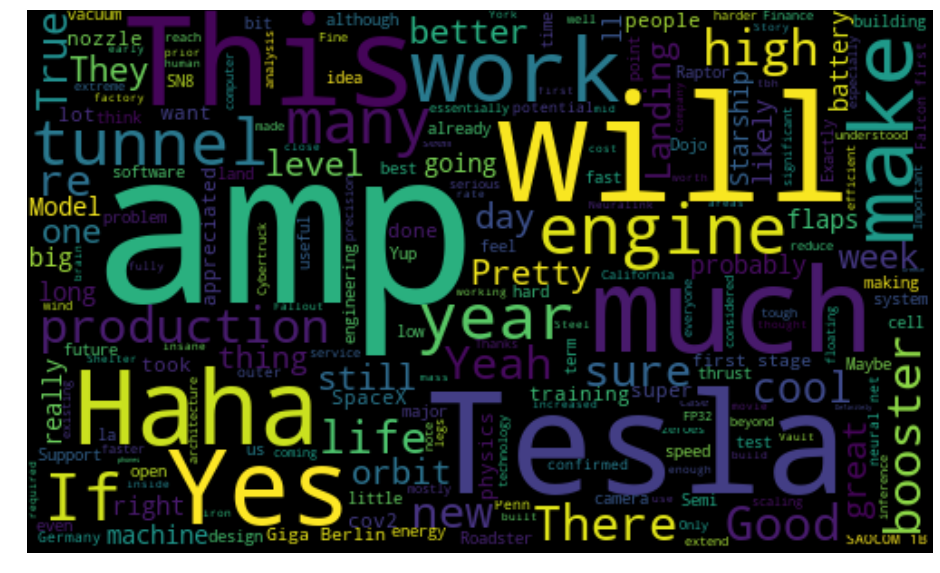

In [70]:
#  Plot the wordcloud
allwords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [71]:
#  Create a function to compute the negative, neutral and postitive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Only thing beyond ludicrous is plaid,1.000000,0.000000,Neutral
1,This does seem like the opposite of open. Op...,0.266667,0.000000,Neutral
2,Haha true,0.475000,0.275000,Positive
3,Maybe I will …,0.000000,0.000000,Neutral
4,Jets are so cool,0.650000,0.350000,Positive
5,Pretty much,0.600000,0.225000,Positive
6,Yes,0.000000,0.000000,Neutral
7,Yahoo Finance is as dumb as it sounds,0.500000,-0.375000,Negative
8,Yes,0.000000,0.000000,Neutral
9,Haha,0.300000,0.200000,Positive


In [72]:
#  Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' +sortedDF['Tweets'][i])
        print()
        j = j+1

1)  Haha true

2)   Jets are so cool

3)    Pretty much

4)   Haha

5)   Roadster will be better

6)   Thanks for your many years of support through very tough times!

7)   We will be a little below that this year (most challenging year we’ve ever had), but probably above that next few years

8)  That’s about right. Maybe a little faster.

9)    Haha

10)   Haha

11) We intend to increase, not reduce battery cell purchases from Panasonic, LG &amp; CATL (possibly other partners too). However, even with our cell suppliers going at maximum speed, we still foresee significant shortages in 2022 &amp; beyond unless we also take action ourselves.

12) Important note about Tesla Battery Day unveil tomorrow. This affects long-term production, especially Semi, Cybertruck &amp; Roadster, but what we announce will not reach serious high-volume production until 2022.

13)  Thanks!

14)    We really need better legs for Starship. They’re coming.

15)    Most likely, all flaps will fold after landing

In [73]:
# print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' +sortedDF['Tweets'][i])
        print()
        j = j+1

1)   Yahoo Finance is as dumb as it sounds

2) : We drove a Model S Long Range Plus for 422.7 miles in California and believe we could have made it to 430.  explain…

3) The extreme difficulty of scaling production of new technology is not well understood. It’s 1000% to 10,000% harder than making a few prototypes. The machine that makes the machine is vastly harder than the machine itself.

4)  There’ll be lots of green space around factory, but building itself is continuous. The “open” areas inside are covered. They’re internal semi truck roads inside a giant monolithic building.

5)   It took an utterly insane amount of work to move the SpaceX &amp; Tesla success probabilities above ~zero

6)  It will be very insane

7)  There are some eerie parallels between The Boring Company &amp; Vault-Tec. We also built our first demonstration tunnel/vault in LA.

8)   All frames stitched to single frame (tricky, as all cameras overlap in different ways) &amp; then creating video segments for la

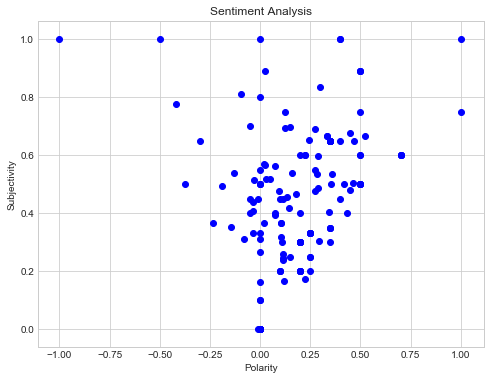

In [74]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [75]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
round((ptweets.shape[0] / df.shape[0])*100, 1)

54.5

In [76]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
round((ntweets.shape[0] / df.shape[0])*100, 1)

10.0

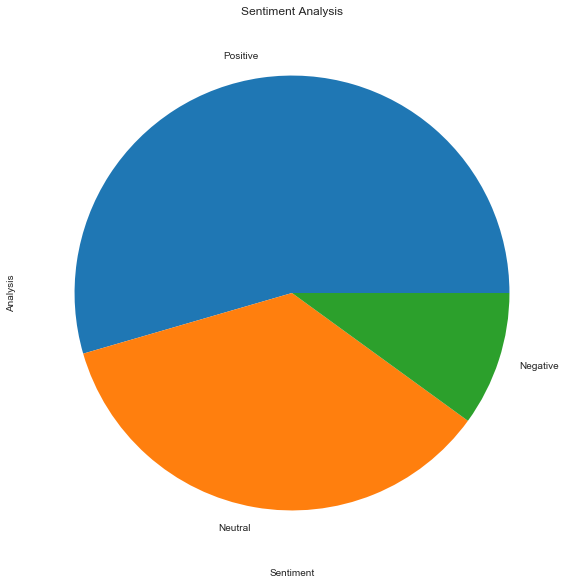

In [81]:
# Show the value counts
df['Analysis'].value_counts()

#  plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()